In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyTelegramBotAPI


     ---------------------------------------- 0.0/244.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/244.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/244.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/244.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/244.2 kB ? eta -:--:--
     - -------------------------------------- 10.2/244.2 kB ? eta -:--:--
     ---- -------------------------------- 30.7/244.2 kB 217.9 kB/s eta 0:00:01
     ---- -------------------------------- 30.7/244.2 kB 217.9 kB/s eta 0:00:01
     ------ ------------------------------ 41.0/244.2 kB 151.3 kB/s eta 0:00:02
     --------- --------------------------- 61.4/244.2 kB 218.8 kB/s eta 0:00:01
     --------- --------------------------- 61.4/244.2 kB 218.8 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/244.2 kB 241.3 kB/s eta 0:00:01
     ------------ ------------------------ 81.9/244.2 kB 241.3 kB/s eta 0:00:01


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


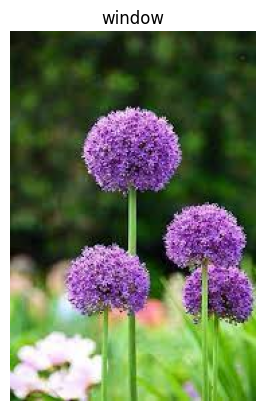

In [9]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('img.jpg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('window')
plt.axis('off')
plt.show()

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [18]:
import telebot

bot= telebot.TeleBot("6722194203:AAGbmgVquFR3ztqHBick6_XVfpGBwkkkums")

@bot.message_handler(commands = ['start'])
def handle_start(message):
    bot.reply_to(message,"HELLO!")


    bot.polling()

In [2]:
pip install pyTelegramBotAPI


Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import telebot

bot= telebot.TeleBot("6968701267:AAGqyb-ZDkJ1efwGjc6c-i4X4ldK0pWzS3c")


#to respond to a command
@bot.message_handler(commands = ['start'])

def handle_start(message):
    bot.reply_to(message, "welcome to bot")
    
    
#to replyto texts    
@bot.message_handler(func=lambda message:True)
def handle_text(message):
    bot.reply_to(message, message.text)


    


bot.polling()

In [7]:
import telebot

bot = telebot.TeleBot("6968701267:AAGqyb-ZDkJ1efwGjc6c-i4X4ldK0pWzS3c")


#to start bot
@bot.message_handler(commands= ['start','help'])
def handle_start_help(message): # we can write here anything other than help
    help_message= "hello im souces bot, you can choose these commands \n  /pinterest to go there \n /github to go there "
    bot.send_message(message.chat.id, help_message)


@bot.message_handler(commands=['pinterest'])
def handle_pinterest_command(message):
    linkpinterest= "https://www.pinterest.com/"
    bot.send_message(message.chat.id, f"link bellow to go to pinterest\n {linkpinterest}")


@bot.message_handler(commands=['github'])
def handle_github_command(message):
    linkgithub= "https://github.com/"
    bot.send_message(message.chat.id, f"to go to github\n {linkgithub}") 

@bot.message_handler(func=lambda message: True)
def handle_other_message(message):
    bot.send_message(message.chat.id, "to see commands send /help")


#to open bot
bot.polling()      


    

In [13]:
import telebot
import cv2
import numpy as np
from io import BytesIO

# قم بتبديل 'YOUR_BOT_TOKEN' بتوكن البوت الخاص بك على تليجرام
bot = telebot.TeleBot("6968701267:AAGqyb-ZDkJ1efwGjc6c-i4X4ldK0pWzS3c")

# وظيفة للتعامل مع الصور
@bot.message_handler(content_types=['photo'])
def handle_photo(message):
    # استخراج معرف الصورة
    file_id = message.photo[-1].file_id
    file_info = bot.get_file(file_id)
    file = bot.download_file(file_info.file_path)

    # تحويل الصورة إلى تنسيق OpenCV
    np_array = np.frombuffer(file, dtype=np.uint8)
    img = cv2.imdecode(np_array, cv2.IMREAD_COLOR)

    # تحويل الصورة إلى الأبيض والأسود
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # استخدام كلاسيفاير للكشف عن الوجوه
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # رسم مربعات حول الوجوه
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # حفظ الصورة المعالجة
    processed_image_path = "processed_image.jpg"
    cv2.imwrite(processed_image_path, img)

    # إرسال الصورة المعالجة إلى المستخدم
    processed_image = open(processed_image_path, "rb")
    bot.send_photo(message.chat.id, processed_image)

    # إرسال رسالة تؤكد معالجة الصورة
    bot.send_message(message.chat.id, "تم معالجة الصورة بنجاح!")

# بدء الاستماع على الرسائل الواردة
bot.polling()




